## Tutorial 3 - Autoencoder Continued Training

In this example, we will demonstrate how a model that has been pretrained can be continued to train with new data. This is useful when you have a model that has been trained on a large dataset, and you want to fine-tune it to a new dataset. BUT, we demonstrate that this is not always a good idea.

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
import tensorflow as tf
from tensorflow.keras.preprocessing import image


### Load our pretrained model

In [2]:
pretrained_model = keras.models.load_model('./initially_trained_autoencoder.tf')

### Load our new symbol and test the autoencoder on this new symbol

1/1 [==============================] - 0s 53ms/step
(1, 784)


2023-06-14 19:38:54.356959: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


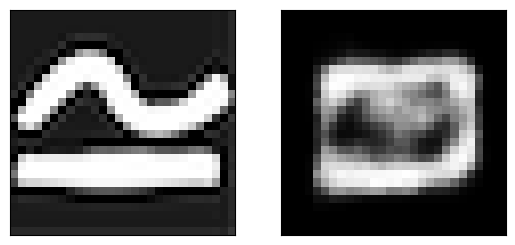

In [3]:
####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")

####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)

#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can, this autoencoder doesn't do a good job with this new symbol.

### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

Let's try to retrain the original model with a mix of the new symbol and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [4]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [5]:
# number of samples of the new image; we can adjust as needed
num_new = 150
# number of samples from the MNIST dataset to use to include in this new dataset
num_mnist = 500

input_arr = input_arr.reshape(784) # flatten the image
np.random.shuffle(train_images) # shuffle the MNIST dataset

new_images = [input_arr for _ in range(num_new)] # create a new dataset of the same image
new_image_set = np.vstack((train_images[:num_mnist], new_images)) # combine the new images with the MNIST images
np.random.shuffle(new_image_set) # shuffle the new dataset

new_images_train, new_images_test = np.split(new_image_set, [int(len(new_image_set)*.8)]) # split into training and test sets


In [6]:
updated_model = keras.models.load_model('./initially_trained_autoencoder.tf')

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
5/5 [==============================] - 1s 29ms/step - loss: 0.2845 - val_loss: 0.2015
Epoch 2/15
5/5 [==============================] - 0s 10ms/step - loss: 0.2128 - val_loss: 0.1911
Epoch 3/15
5/5 [==============================] - 0s 12ms/step - loss: 0.1986 - val_loss: 0.1773
Epoch 4/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1829 - val_loss: 0.1697
Epoch 5/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1729 - val_loss: 0.1619
Epoch 6/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1638 - val_loss: 0.1559
Epoch 7/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1564 - val_loss: 0.1501
Epoch 8/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1487 - val_loss: 0.1458
Epoch 9/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1432 - val_loss: 0.1424
Epoch 10/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1388 - val_loss: 0.1403
Epoch 11/15
5/5 [============

### Test the model on the original test set

313/313 [==============================] - 0s 1ms/step


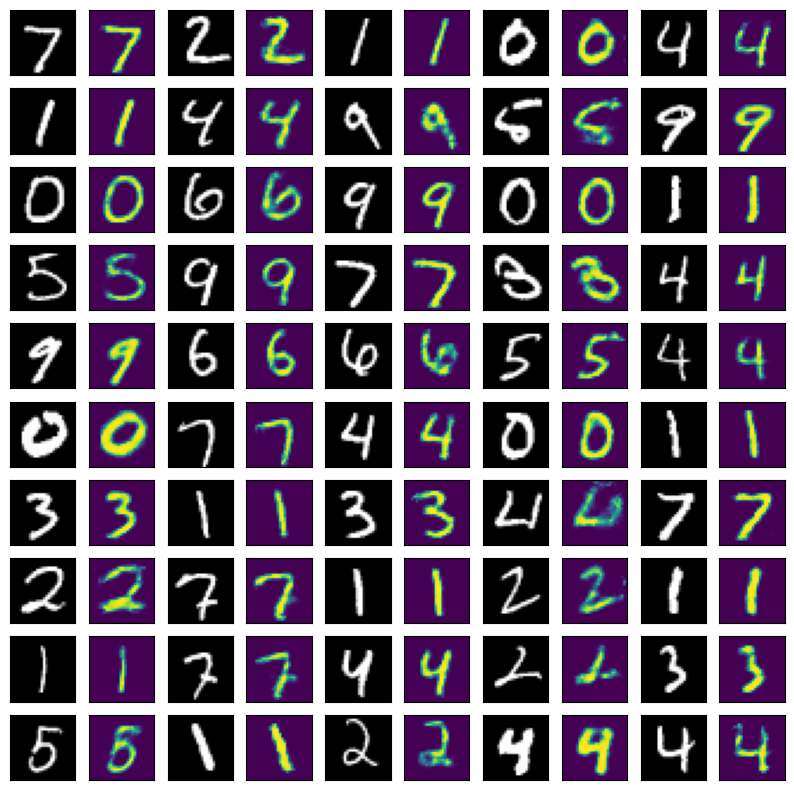

In [7]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set

1/1 [==============================] - 0s 11ms/step
(1, 784)


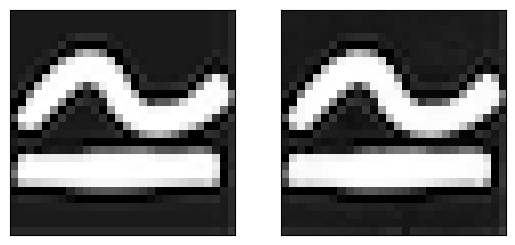

In [8]:
####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary 

If we try to transfer previous learning to our model and avoid a large retraining process, retraining the autoencoder with new data is tricky. We must deal with the problem of 'forgetting' the original digits, while 'remembering' new digits. 